Дан граф текста, множество вершин совпадает со словарем текста, связи являются взвешенными и показывают как часто два слова находились в одном окне длины N. Найти слова с наибольшей мерой посредничества.


# Формат

#### разделитель (5 символов равно)
#### URL
#### название источника
#### дата
#### автор
#### название статьи
#### текст статьи

In [289]:
from bs4 import BeautifulSoup
import requests 
import re

### Функция делает список из ссылок на новости со страницы 
class="col-sm-4 no-padding" - это класс тэга, где ссылка на новость 

In [278]:
def url_of_news (news_url, main_url):
    list_of_url = []
    response = requests.get(news_url)
    soup = BeautifulSoup(response.text)
    elems = soup.findAll('a', {'class': 'col-sm-4 no-padding'})
    for e in elems:
        url_of_new = main_url + e['href']
        list_of_url.append(url_of_new)
    return list_of_url

### Функция делает часть пути для остальных страниц

In [297]:
def url_of_pages (news_url, part_of_url):
    list_of_pages = [news_url]
    for i in range (2, 1816):
        url_of_page = news_url + part_of_url + str(i)
        list_of_pages.append(url_of_page)
    return list_of_pages      

Функция берет название ресурса

In [280]:
def source_name (news_url):
    response = requests.get(news_url)
    soup = BeautifulSoup(response.text)
    source_tag = soup.findAll('a', {'title': 'Вечерний Челябинск'})
    for e in source_tag:
        source = e.get_text()
    return source

### Функция берет информацию со страницы с конкретной новостью:

In [293]:
def get_news (url_of_new):
    response = requests.get(url_of_new)
    soup = BeautifulSoup(response.text)
    
    #название статьи 
    name_of_article = soup.h1.text
    
    #автор 
    author_tag = soup.findAll('span', {'class': 'link'})
    if author_tag != []:
        for e in author_tag:
            author = re.search ('[а-яА-ЯёЁ ]+', e.get_text())
            if author:
                author = author.group()
            else:
                author = 'без автора'
    else:
        author = 'без автора'
        
    #дата
    date_tag = soup.findAll('div', {'class': 'date'})
    if date_tag != []:
        date_str = str(date_tag[0])
        date = re.search ('([0-9]{2})\.([0-9]{2})\.([0-9]{4})', date_str)
        if date:
            date = date.group()
        else:
            date = 'дата отсутствует'
    else:
        date = 'дата отсутствует'
    
    #Текст статьи 
    text_tag = soup.findAll('div', {'class': 'detail-text'})
    if text_tag != []:
        for t in text_tag:
            txt = str(t)
        text_1 = re.sub('\<span[^>]*?>.*?<\/span>{1}', '', txt)
        text_2= re.sub('(\</?[^>]+>)', '', text_1)
        text_of_article = re.sub ('\s+', ' ', text_2)
    else:
        text_of_article = 'текст отсутсвует'
    
    return date, author, name_of_article, text_of_article
    

# Выкачиваем новости

In [282]:
news_url = 'https://vecherka.su/articles/news/'
main_url = 'https://vecherka.su'
part_of_url = '?PAGEN_1='
separator = '====='
list_of_url = []
urls_list = []
source = source_name (news_url)

In [283]:
with open('vecherny_chelyabinsk.txt', 'w', encoding='utf-8') as f:
    f.write('')

In [298]:
list_of_pages = url_of_pages (news_url, part_of_url)

In [299]:
for page in list_of_pages:
    list_of_url = url_of_news (page, main_url)
    urls_list.extend(list_of_url)

In [300]:
urls_list

['https://vecherka.su/articles/news/162653/',
 'https://vecherka.su/articles/news/162652/',
 'https://vecherka.su/articles/news/162651/',
 'https://vecherka.su/articles/news/162650/',
 'https://vecherka.su/articles/news/162649/',
 'https://vecherka.su/articles/news/162648/',
 'https://vecherka.su/articles/news/162571/',
 'https://vecherka.su/articles/news/162645/',
 'https://vecherka.su/articles/news/162646/',
 'https://vecherka.su/articles/news/162644/',
 'https://vecherka.su/articles/news/162643/',
 'https://vecherka.su/articles/news/162642/',
 'https://vecherka.su/articles/news/162639/',
 'https://vecherka.su/articles/news/162641/',
 'https://vecherka.su/articles/news/162640/',
 'https://vecherka.su/articles/news/162638/',
 'https://vecherka.su/articles/news/162637/',
 'https://vecherka.su/articles/news/162636/',
 'https://vecherka.su/articles/news/162634/',
 'https://vecherka.su/articles/news/162635/',
 'https://vecherka.su/articles/news/162633/',
 'https://vecherka.su/articles/new

In [292]:
for url in urls_list:
    date, author, name_of_article, text_of_article = get_news (url)
    with open('vecherny_chelyabinsk.txt', 'a', encoding='utf-8') as f:
        f.write(separator +'\n'+ url + '\n'+ source + '\n' + date + '\n' + author + '\n' + name_of_article + '\n' + text_of_article + '\n')

AttributeError: 'NoneType' object has no attribute 'group'

Создадим список оставшихся после сбоя ссылок

In [301]:
urls_list.index('https://vecherka.su/articles/news/143785/')

14746

In [303]:
urls_list_2 = []

In [304]:
for url in urls_list[14747:]:
    urls_list_2.append(url)
    

In [305]:
urls_list_2

['https://vecherka.su/articles/news/143784/',
 'https://vecherka.su/articles/news/143781/',
 'https://vecherka.su/articles/news/143778/',
 'https://vecherka.su/articles/news/143776/',
 'https://vecherka.su/articles/news/143775/',
 'https://vecherka.su/articles/news/143772/',
 'https://vecherka.su/articles/news/143769/',
 'https://vecherka.su/articles/news/143768/',
 'https://vecherka.su/articles/society/143767/',
 'https://vecherka.su/articles/news/143766/',
 'https://vecherka.su/articles/news/143763/',
 'https://vecherka.su/articles/news/143764/',
 'https://vecherka.su/articles/news/143762/',
 'https://vecherka.su/articles/news/143761/',
 'https://vecherka.su/articles/news/143760/',
 'https://vecherka.su/articles/news/143759/',
 'https://vecherka.su/articles/society/143758/',
 'https://vecherka.su/articles/news/143757/',
 'https://vecherka.su/articles/news/143756/',
 'https://vecherka.su/articles/news/143755/',
 'https://vecherka.su/articles/news/143754/',
 'https://vecherka.su/articl

Функция пройдется по ссылкам после сбоя

In [ ]:
for url in urls_list_2:
    date, author, name_of_article, text_of_article = get_news (url)
    with open('vecherny_chelyabinsk.txt', 'a', encoding='utf-8') as f:
        f.write(separator +'\n'+ url + '\n'+ source + '\n' + date + '\n' + author + '\n' + name_of_article + '\n' + text_of_article + '\n')

# ПРОБА ПЕРА (это чисто для меня)

## Функция делает список страниц с момента прирывания (678)

In [ ]:
def url_of_pages (news_url, part_of_url):
    list_of_pages = [news_url]
    for i in range (2, 1810):
        url_of_page = news_url + part_of_url + str(i)
        list_of_pages.append(url_of_page)
    return list_of_pages    

In [210]:
part_of_url = '?PAGEN_1='

In [ ]:
for i in range (2, 1810):
    url_of_page = main_url

<!DOCTYPE html>

<html>
<head>
<title>Врачам детской больницы Челябинска вернут урезанную зарплату. Вечерний Челябинск.</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<script src="/bitrix/templates/vecherka/vendor/jquery-1.10.1.min.js"></script>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="https://fonts.googleapis.com/css?family=Open+Sans:400,700&amp;subset=latin,cyrillic-ext" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/assets/css/bootstrap.min.css" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/vendor/jquery-ui-1.9.2.custom.min.css" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/vendor/jquery.jscrollpane.css" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/vendor/fancybox/jquery.fancybox.css" rel="stylesheet" ty
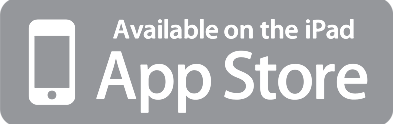

In [248]:
response2 = requests.get('https://vecherka.su/articles/news/145578/')
soup2 = BeautifulSoup(response2.text)
#elems2 = soup2.find_all('span')
#print(elems1)
print(soup2)

In [249]:
response = requests.get('https://vecherka.su/articles/news/145576/')

<!DOCTYPE html>

<html>
<head>
<title>Чтобы похудеть, житель Челябинска прошел пешком до Москвы. Вечерний Челябинск.</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<script src="/bitrix/templates/vecherka/vendor/jquery-1.10.1.min.js"></script>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="https://fonts.googleapis.com/css?family=Open+Sans:400,700&amp;subset=latin,cyrillic-ext" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/assets/css/bootstrap.min.css" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/vendor/jquery-ui-1.9.2.custom.min.css" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/vendor/jquery.jscrollpane.css" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/vendor/fancybox/jquery.fancybox.css" rel="stylesheet" type=
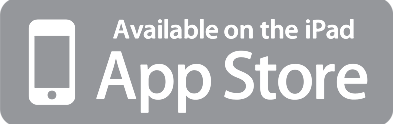

In [250]:
soup1 = BeautifulSoup(response.text)
#elems1 = soup.findAll('span', {'class': 'link'})

print(soup1)

In [251]:
date_tag = soup1.findAll('div', {'class': 'date'})
date_str = str(date_tag[0])
date = re.search ('([0-9]{2})\.([0-9]{2})\.([0-9]{4})', date_str).group()

In [63]:
print(elems1[0])

<a href="/about/">О компании</a>


In [64]:
elems2 = soup.findAll('a', {'class': 'col-sm-4 no-padding'})

In [65]:
list_of_url = []

In [66]:
for e in elems2:
    url_of_new = web_url + e['href']
    list_of_url.append(url_of_new)

In [67]:
print(list_of_url)

['https://vecherka.su/articles/news/162533/', 'https://vecherka.su/articles/news/162532/', 'https://vecherka.su/articles/news/162531/', 'https://vecherka.su/articles/news/162530/', 'https://vecherka.su/articles/news/162529/', 'https://vecherka.su/articles/news/162528/', 'https://vecherka.su/articles/news/162526/', 'https://vecherka.su/articles/news/162498/', 'https://vecherka.su/articles/news/162527/', 'https://vecherka.su/articles/news/162497/', 'https://vecherka.su/articles/news/162495/', 'https://vecherka.su/articles/news/162494/', 'https://vecherka.su/articles/news/162496/', 'https://vecherka.su/articles/news/162492/', 'https://vecherka.su/articles/news/162493/', 'https://vecherka.su/articles/news/162491/', 'https://vecherka.su/articles/news/162490/', 'https://vecherka.su/articles/news/162489/', 'https://vecherka.su/articles/news/162488/', 'https://vecherka.su/articles/news/162487/']


In [84]:
response2 = requests.get(list_of_url[0])
soup2 = BeautifulSoup(response2.text)

<!DOCTYPE html>

<html>
<head>
<title>Таксисты Челябинска отказываются работать. Вечерний Челябинск.</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<script src="/bitrix/templates/vecherka/vendor/jquery-1.10.1.min.js"></script>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="https://fonts.googleapis.com/css?family=Open+Sans:400,700&amp;subset=latin,cyrillic-ext" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/assets/css/bootstrap.min.css" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/vendor/jquery-ui-1.9.2.custom.min.css" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/vendor/jquery.jscrollpane.css" rel="stylesheet" type="text/css"/>
<link href="/bitrix/templates/vecherka/vendor/fancybox/jquery.fancybox.css" rel="stylesheet" type="text/css"/>
<li
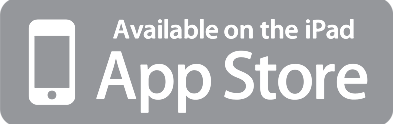

In [87]:
soup2

In [85]:
name_of_article = soup2.h1.text
#name_of_article = soup2.find_all('h1')

In [86]:
name_of_article

'Таксисты Челябинска отказываются работать'

In [178]:
elems3 = soup2.find_all('div', {'class': 'detail-text'})
for e in elems3:
    tag_text = str(e)
text_1 = re.sub('\<span[^>]*?>.*?<\/span>{1}', '', tag_text)
text_of_article = re.sub('(\</?[^>]+>)', '', text_1)
text_of_article1 = re.sub ('\s+', ' ', text_of_article)
text_of_article1

' Забастовку таксисты обещают провести в следующую пятницу, 23 октября, по всей области. С 6 и до 24 часов водители обещают не выходить на линию. Причина — договоренность властей и агрегатора перевозок о транспортировке ковидных больных. «Яндекс.Такси» договорилось с администрацией Челябинской области перевозить коронавирусных больных за свой счет, — говорится в сообщении. — После чего компания резко опустила гарантию заработка для работников такси. В связи с этим в следующую пятницу, 23 октября, с 6 до 24 часов все работники «Яндекс.Такси», водители, диспетчеры, автопарки и т. д. не выходят на работу!!! ЗАБАСТОВКА!!!» (стилистика сохранена. — Авт.). При этом таксисты озвучили условия, при которых они готовы вернуться к работе: возврат гарантированного заработка на прежний уровень; минимальная заявка — 100 рублей, включая комиссию парка (НДС). Сообщение появилось сегодня днем в одном из пабликов социальной сети «ВКонтакте». Читайте «Вечерку» на «Яндекс.Дзен» и подписывайтесь на наш тел

In [179]:
elems3

[<div class="detail-text">
 <span style="font-size: 9pt; color: #898989;">Фото Дмитрия Куткина</span><br/>
 <br/>
  Забастовку таксисты обещают провести в следующую пятницу, 23 октября, по всей области. С 6 и до 24 часов водители обещают не выходить на линию. Причина — договоренность властей и агрегатора перевозок о транспортировке ковидных больных.<br/>
 <blockquote>
 	 «Яндекс.Такси» договорилось с администрацией Челябинской области перевозить коронавирусных больных за свой счет, — говорится в сообщении. — После чего компания резко опустила гарантию заработка для работников такси. В связи с этим в следующую пятницу, 23 октября, с 6 до 24 часов все работники «Яндекс.Такси», водители, диспетчеры, автопарки и т. д. не выходят на работу!!! ЗАБАСТОВКА!!!» (стилистика сохранена. — <i>Авт.</i>).
 </blockquote>
  При этом таксисты озвучили условия, при которых они готовы вернуться к работе:<br/>
 <br/>
 <ul>
 <li>возврат гарантированного заработка на прежний уровень;</li>
 <li>
 	минимальная

In [113]:
date_tag = soup2.findAll('div', {'class': 'date'})
date_str = str(date_tag[0])
date = re.search ('([0-9]{2})\.([0-9]{2})\.([0-9]{4})', date_str).group()
date

'14.10.2020'

In [105]:
author_tag = soup2.find_all('span', {'class': 'link'})
for e in author_tag:
    author = re.search ('[а-яА-ЯёЁ ]+', e.get_text()).group()
author

'Ирина Яббарова'

In [89]:
print (elems3)

[<div class="detail-text">
<span style="font-size: 9pt; color: #898989;">Фото Дмитрия Куткина</span><br/>
<br/>
 Забастовку таксисты обещают провести в следующую пятницу, 23 октября, по всей области. С 6 и до 24 часов водители обещают не выходить на линию. Причина — договоренность властей и агрегатора перевозок о транспортировке ковидных больных.<br/>
<blockquote>
	 «Яндекс.Такси» договорилось с администрацией Челябинской области перевозить коронавирусных больных за свой счет, — говорится в сообщении. — После чего компания резко опустила гарантию заработка для работников такси. В связи с этим в следующую пятницу, 23 октября, с 6 до 24 часов все работники «Яндекс.Такси», водители, диспетчеры, автопарки и т. д. не выходят на работу!!! ЗАБАСТОВКА!!!» (стилистика сохранена. — <i>Авт.</i>).
</blockquote>
 При этом таксисты озвучили условия, при которых они готовы вернуться к работе:<br/>
<br/>
<ul>
<li>возврат гарантированного заработка на прежний уровень;</li>
<li>
	минимальная заявка — 10